# Statistical Analysis and Hypothesis Testing

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [2]:
#Read data using pandas
user_df=pd.read_csv("C:/Users/user/Documents/Aine/Stat/cookie_cats.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## 1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### 1.1 Identify missing value

In [3]:
#Check for any missing values in the data using isnull() function
user_df.isnull().sum()



userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### 1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

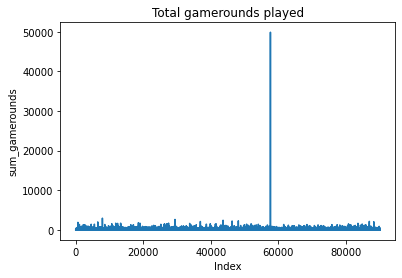

In [4]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [5]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier

out_index=user_df[user_df['sum_gamerounds']==user_df['sum_gamerounds'].max()].index.tolist()

In [6]:
#Droping a row with outlier

user_df.drop(index=out_index,axis=0,inplace=True)

In [7]:
user_df.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'index')

Text(0, 0.5, 'sum_gamerounds')

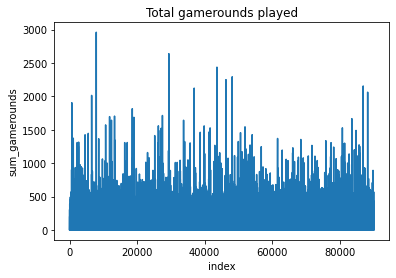

In [8]:
#Plot the graph for sum_gamerounds player after removing the outlier
plt.title("Total gamerounds played")
plt.xlabel("index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)


## 2. Plot summary statistics and identify trends to answer basis business questions

### 2.1 Number of overall 7-day retention rate of the game

In [9]:
#Insert calculation for 7-day retention rate

retention_rate_7=round(user_df.retention_7.sum()/user_df.shape[0]*100,2)
print("Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overal 7 days retention rate of the game for both versions is:  18.61 %


### 2.2 Number of players never played the game after installing

In [10]:
# Find number of customers with sum_gamerounds is equal to zero

user_df[user_df['sum_gamerounds']==0].shape[0]

3994

### 2.3 Number of users decrease as the level progresses highlighting the difficulty of the game?

Text(0.5, 1.0, 'sum_gamerounds group vs play counts')

Text(0.5, 0, 'sum_gamerounds group')

Text(0, 0.5, 'play counts')

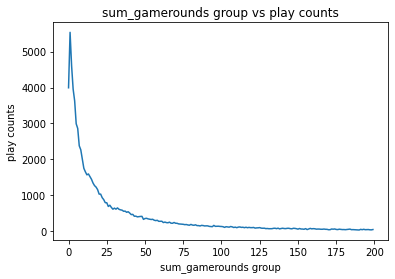

In [11]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart
new_data=user_df[["userid","sum_gamerounds"]].groupby("sum_gamerounds").count().reset_index().rename(columns={"userid":"count"})[0:200]
plt.title("sum_gamerounds group vs play counts")
plt.xlabel("sum_gamerounds group")
plt.ylabel("play counts")
plt.plot(new_data["sum_gamerounds"],new_data["count"])


## 3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### 3.1 Seven days retention rate summary for different game versions

In [12]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    
Retention rate of gate_30  =19%
Retention rate of gate_40  =18.2%  

### 3.2 Gamerounds summary for different game versions

In [13]:
#use pandas group by to calculate average game rounds played summarized by different versions
usage_data=user_df[["version","sum_gamerounds"]].groupby("version").agg("mean")


In [14]:
usage_data

,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


In [15]:
retention7gate_40=user_df[(user_df["retention_7"]==True) & (user_df["version"]=="gate_40")].sum_gamerounds.mean()
retention7gate_30=user_df[(user_df["retention_7"]==True)&(user_df["version"]=="gate_30")].sum_gamerounds.mean()
print("Average sum_gamerounds of gate_40 user at retention_7= ",round(retention7gate_40,0))
print("Average sum_gamerounds of gate_30 user at retention_7= ",round(retention7gate_30,0))

Average sum_gamerounds of gate_40 user at retention_7=  166.0
Average sum_gamerounds of gate_30 user at retention_7=  160.0


<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 

## 4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [16]:
#Define A/B groups for hypothesis testing
#user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
ab_df=user_df
ab_df["version"]=ab_df["version"].replace(["gate_30","gate_40"],["A", "B"])
group_A=pd.DataFrame(ab_df[ab_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(ab_df[ab_df.version=="B"]['sum_gamerounds'])


In [17]:
group_A.head()

,sum_gamerounds
0,3
1,38
6,0
11,0
13,39


### 4.1 Shapiro test of Normality

In [18]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
shapiro(group_A)

#test for group_B
shapiro(group_B)


(0.48864424228668213, 0.0)

(0.48256540298461914, 0.0)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?
    As pvalue of group is less than significance value(alpha=.05) hence Ho is rejected i.e group_A Distribution is not normal.
    Similarly p-value of group_B also less than .05 hence group_B distribution is not normal.

### 4.2 Test of homegienity of variance

In [19]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results

stats.levene(group_A.sum_gamerounds,group_B.sum_gamerounds)


LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test
     As p-value greater than significance value(alpha=.05) hence fail to reject H0 i.e Two groups have equal variances

### 4.3 Test of significance: Two sample test

In [20]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis

stats.mannwhitneyu(group_A.sum_gamerounds,group_B.sum_gamerounds)


MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__
    

     As p-value is less than significance value(alpha=.05) hence  reject H0 i.e Two samples are different

## 5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [21]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function

# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: first sample is greater than second one

stats.mannwhitneyu(group_A.sum_gamerounds,group_B.sum_gamerounds,alternative="greater")


MannwhitneyuResult(statistic=1024285761.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40
    In mann whitney u test performed twice ,first we have seen that both group are different in second test we ket null hypothesis same as first test but chnge the alternate hypothesis to check wheteher group_A is greater than group_B.p value of the second mann whitney u test is less than significance value hence Ho is rejected .Finally it can be colcluded that sum_gamerouns of gate_30 is higher than gate_40 hennce there is no change of gate require and we can reject CEO's hypothesis.
    